# Plots for the G-UCB section

### G-UCB vs benchmark algorithms

In [20]:
from core import *
from topologies import *

from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np 
import networkx as nx

In [21]:
topologies = {'(a) Fully connected':fully_connected(),
              '(b) Line':line(),
              '(c) Circle':circle(),
              '(d) Star':star(),
              '(e) Tree':tree(),
              '(f) Grid':grid()}

topologies_ = list(topologies.keys())

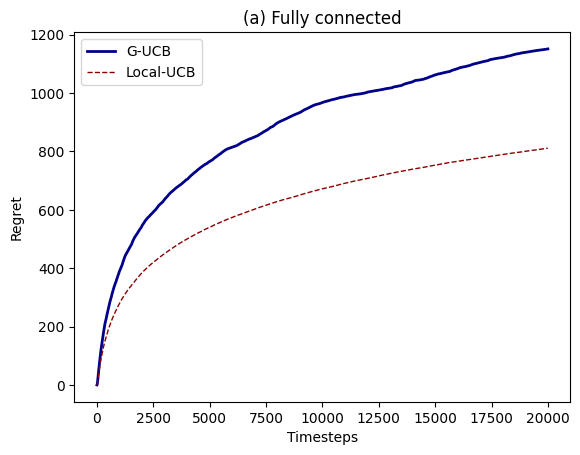

In [4]:
top = topologies_[0]
plt.figure(0)
    
nodes, edges = topologies[top]
fc = (top == "Fully connected")

regrets = np.zeros((100,20000,2))
for i in tqdm(range(100)):
    gucb = G_UCB(nodes,edges,fc)
    gucb.training()

    lucb = LOCAL_UCB(nodes,edges,fc)
    lucb.training()

    regrets[i,:,0] = gucb.regret
    regrets[i,:,1] = lucb.regret

plt.plot(np.mean(regrets[:,:,0], axis=0),color='darkblue', linewidth=2,label='G-UCB')
plt.plot(np.mean(regrets[:,:,1], axis=0),color='darkred', linestyle='dashed',linewidth=1,label='Local-UCB')

plt.title(top)
plt.xlabel('Timesteps')
plt.ylabel('Regret')
plt.legend()

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [13:37<00:00,  8.18s/it]


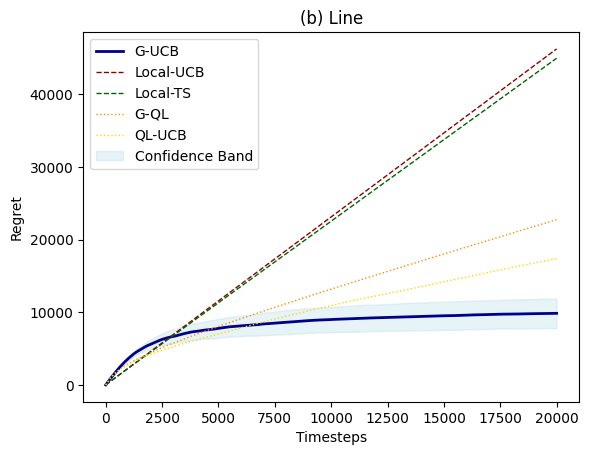

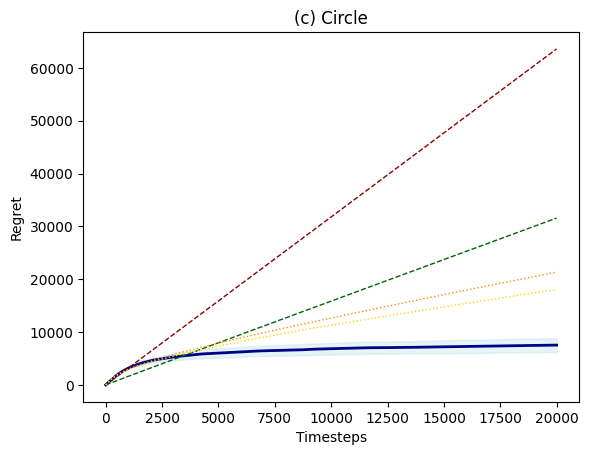

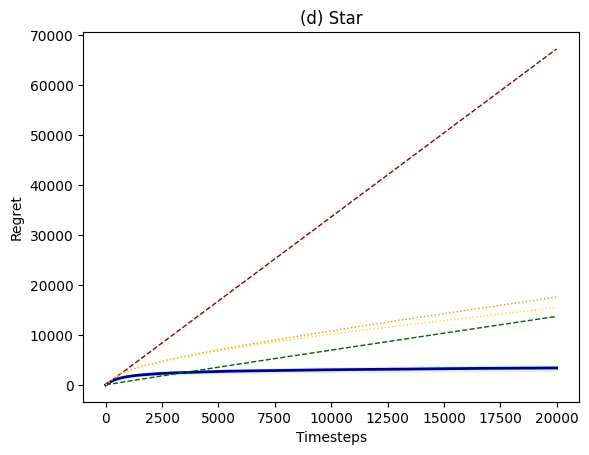

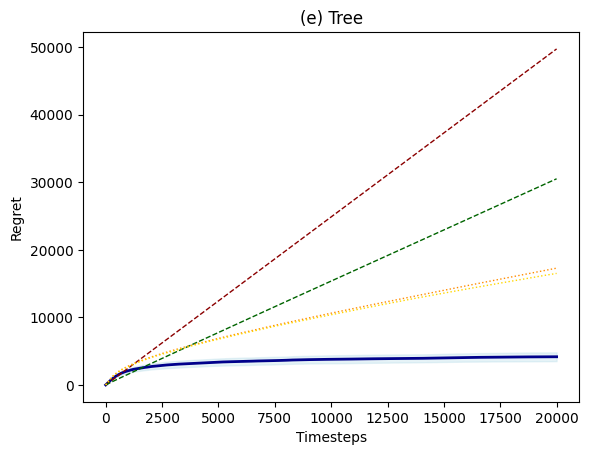

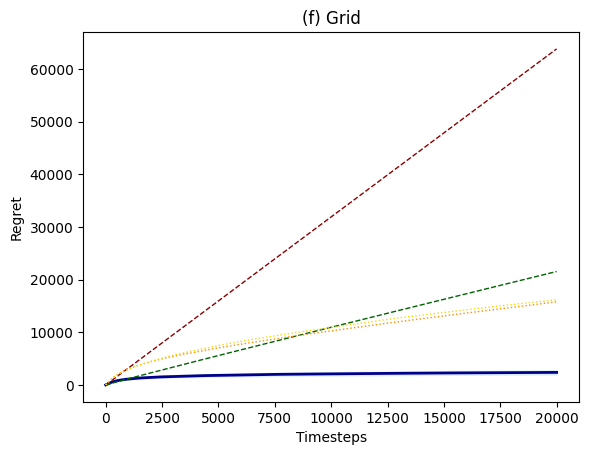

In [16]:
k = 0

for top in topologies_[1:]:
    plt.figure(k)
    
    nodes, edges = topologies[top]
    fc = (top == "Fully connected")

    regrets = np.zeros((100,20000,5))
    for i in tqdm(range(100)):
        gucb = G_UCB(nodes,edges,fc)
        gucb.training()

        lucb = LOCAL_UCB(nodes,edges,fc)
        lucb.training()

        lts = LOCAL_TS(nodes, edges,fc)
        lts.training()

        gql = G_QL(nodes,edges,fc)
        gql.training()

        qlucb = QL_UCB(nodes, edges, fc)
        qlucb.training()

        regrets[i,:,0] = gucb.regret
        regrets[i,:,1] = lucb.regret
        regrets[i,:,2] = lts.regret
        regrets[i,:,3] = gql.regret
        regrets[i,:,4] = qlucb.regret

    plt.plot(np.mean(regrets[:,:,0], axis=0),color='darkblue', linewidth=2,label='G-UCB')
    plt.plot(np.mean(regrets[:,:,1], axis=0),color='darkred', linestyle='dashed',linewidth=1,label='Local-UCB')
    plt.plot(np.mean(regrets[:,:,2], axis=0),color='darkgreen', linestyle='dashed',linewidth=1,label='Local-TS')
    plt.plot(np.mean(regrets[:,:,3], axis=0),color='darkorange', linestyle='dotted',linewidth=1,label='G-QL')
    plt.plot(np.mean(regrets[:,:,4], axis=0),color='gold', linestyle='dotted',linewidth=1,label='QL-UCB')

    std_dev_values = np.std(regrets[:,:,0], axis=0)

    # Calculate upper and lower bounds for the confidence band
    lower_bound = np.mean(regrets[:,:,0], axis=0) - std_dev_values
    upper_bound = np.mean(regrets[:,:,0], axis=0) + std_dev_values
    plt.fill_between(range(regrets.shape[1]), lower_bound, upper_bound, color='lightblue', alpha=0.3, label='Confidence Band')

    if k == 0:
        plt.legend()

    plt.title(top)
    plt.xlabel('Timesteps')
    plt.ylabel('Regret')

    k += 1

### Synthetic robotic simulation 

100%|██████████| 100/100 [00:08<00:00, 11.97it/s]


Text(0.5, 1.0, '(b) Average regret with confidence band')

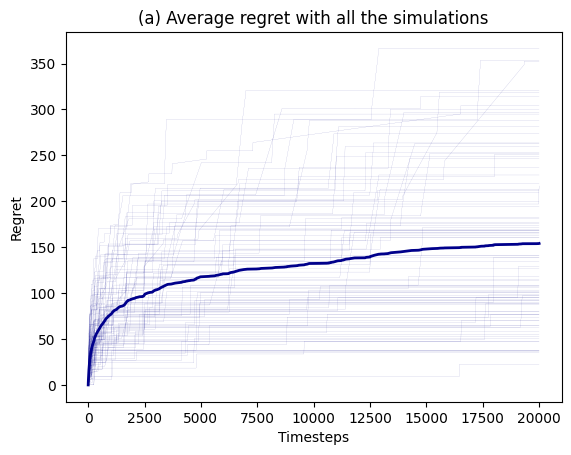

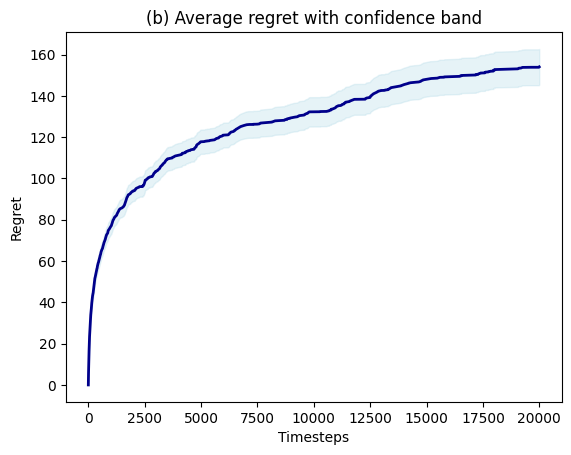

In [22]:
plt.figure(0)
nodes, edges = robo_env()

regrets = np.zeros((100,20000))
for i in tqdm(range(100)):
    gucb = G_UCB(nodes,edges,fc=False)
    gucb.training()
    regrets[i,:] = gucb.regret
    plt.plot(gucb.regret,color='darkblue', linewidth=0.05)

mean_values = np.mean(regrets, axis=0)
plt.plot(np.mean(regrets, axis=0),color='darkblue', linewidth=2)
plt.xlabel('Timesteps')
plt.ylabel('Regret')
plt.title('(a) Average regret with all the simulations')

plt.figure(1)
plt.plot(np.mean(regrets, axis=0),color='darkblue', linewidth=2)
std_dev_values = np.std(regrets, axis=0)

# Calculate upper and lower bounds for the confidence band
lower_bound = mean_values - std_dev_values/10
upper_bound = mean_values + std_dev_values/10
plt.fill_between(range(regrets.shape[1]), lower_bound, upper_bound, color='lightblue', alpha=0.3, label='Confidence Band')

plt.xlabel('Timesteps')
plt.ylabel('Regret')
plt.title('(b) Average regret with confidence band')


### Map of the synthetic robotic environment

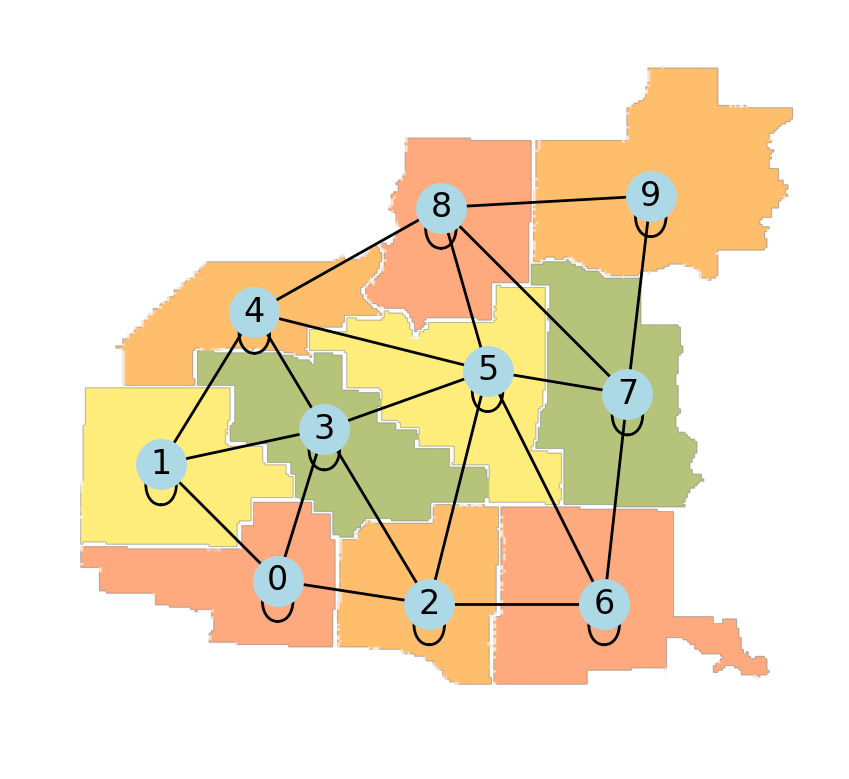

In [114]:
plt.figure(dpi=200)
img = mpimg.imread('Map.png')
imgplot = plt.imshow(img)

nodes_loc = np.array([(110,240),
                      (60,190),
                     (175,250),
                     (130,175),
                     (100,125),
                     (200,150),
                     (250,250),
                     (260,160),
                     (180,80),
                     (270,75)])

plt.scatter(nodes_loc[:,0],nodes_loc[:,1])
    
G = nx.Graph()

G.add_edges_from([(i,i) for i in range(len(nodes_loc))])
G.add_edges_from([(0,1),
                 (0,2),
                 (0,3),
                 (1,3),
                 (1,4),
                 (2,3),
                 (2,5),
                 (2,6),
                 (3,4),
                 (3,5),
                 (4,5),
                 (4,8),
                 (5,6),
                 (5,7),
                 (5,8),
                 (6,7),
                 (7,8),
                 (7,9),
                 (8,9)])
nx.draw(G,pos = nodes_loc,node_color='lightblue',labels={i:i for i in range(len(nodes_loc))})
    

# nx.draw(G,pos = nodes_loc,node_color='deepskyblue',node_size=12)
    
# plt.savefig('network.png')
plt.show()

______________________

# Plot for the Multi-GUCB section

In [1]:
from mag import *

from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np 
import networkx as nx

In [11]:
regrets = np.zeros((100,int(1e5)))
for i in tqdm(range(100)):
    multi_g = Multi_GUCB(max_iter = 1e5)
    multi_g.learning()
    regrets[i,:] = multi_g.regret

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [20:03<00:00, 12.03s/it]


<Figure size 640x480 with 0 Axes>

100%|██████████| 100/100 [00:00<00:00, 257.28it/s]


Text(0.5, 1.0, '(b) System regret as a function of time with confidence band')

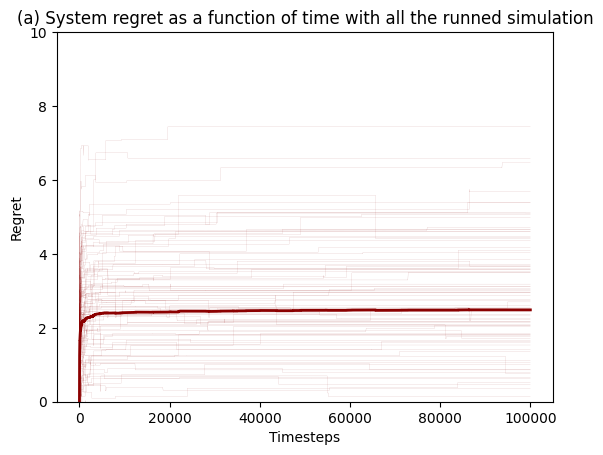

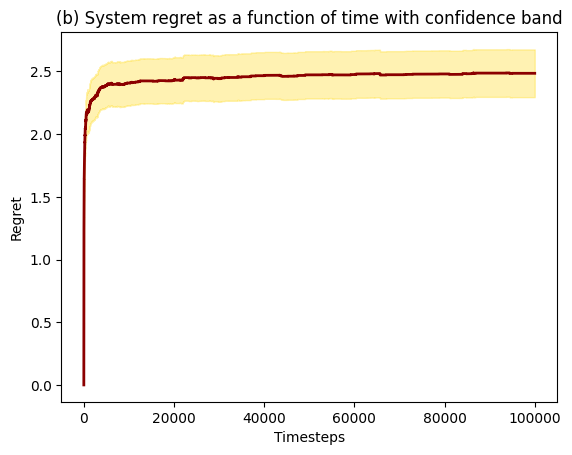

In [18]:
plt.figure(0)
plt.ylim(bottom=0)
plt.ylim(top=10)
for i in tqdm(range(100)):
    plt.plot(regrets[i,:],color='darkred', linewidth=0.05)

plt.plot(np.mean(regrets, axis=0),color='darkred', linewidth=2)
plt.xlabel('Timesteps')
plt.ylabel('Regret')
plt.title('(a) System regret as a function of time with all the runned simulation')
plt.figure(1)
plt.plot(np.mean(regrets, axis=0),color='darkred', linewidth=2)
std_dev_values = np.std(regrets, axis=0)
mean_values = np.mean(regrets, axis=0)
# Calculate upper and lower bounds for the confidence band
lower_bound = mean_values - std_dev_values/10
upper_bound = mean_values + std_dev_values/10
plt.fill_between(range(regrets.shape[1]), lower_bound, upper_bound, color='gold', alpha=0.3, label='Confidence Band')

plt.xlabel('Timesteps')
plt.ylabel('Regret')
plt.title('(b) System regret as a function of time with confidence band')